In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import chardet
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Attempting to model DOM (Days on markets) of each property
df = pd.read_csv('../data/denver_augmented_clean.csv')

df["list_date"] = pd.to_datetime(df["list_date"])
df["sale_date"] = pd.to_datetime(df["sale_date"])

mapping = {k: v for v, k in enumerate(df.property_type.unique())}
mapping

{'SINGLE': 0,
 'CONDO': 1,
 'MULTI_FAMILY': 2,
 'OTHER': 3,
 'TOWNHOUSE': 4,
 'LAND': 5}

In [3]:
df['dom'] = (df['sale_date'] - df['list_date']).dt.days.astype('int16')

In [4]:
df = df[(df['dom'] > 0) & (df['dom'] < 100)]

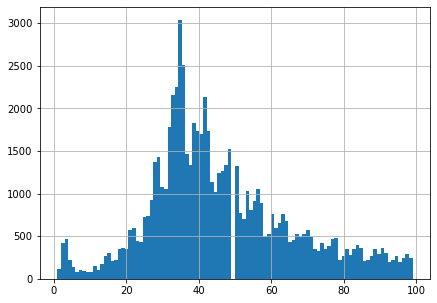

In [5]:
df['dom'].hist(bins=100, figsize=(7, 5))

In [6]:
def calculate_mean_dom(x):
  before = x['list_date'] - pd.Timedelta(days=90)
  
  near_dates = df[(df['list_date'] >= before) & (df['list_date'] < x['list_date'])]
  mean_dom = near_dates['dom'].mean()
  if mean_dom > 0:
    x.at['mean_dom'] = mean_dom
  return x

In [7]:
df['mean_dom'] = df['dom'].mean()

In [ ]:
df.apply(calculate_mean_dom, axis=1)

In [ ]:
df['mean_dom'].hist()

In [ ]:
y = df['dom'].copy()

X = df.drop(columns=['property_id', 'list_date', 'sale_date', 'dom'])
X['property_type_code'] = X['property_type'].map(mapping)
X = X.drop(columns=['property_type'])
X.info()

In [ ]:
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
models = {
  'Linear regression': LinearRegression(),
  'Ridge': Ridge(alpha=1.0),
  'Lasso': linear_model.Lasso(alpha=0.1),
  'Random Forest Regression': RandomForestRegressor(max_depth=2, random_state=0),
#   'Support Vector Regression': SVR(C=1.0, epsilon=0.2)
}

In [ ]:
for md in models.keys():
  res = models[md].fit(X_train, y_train)
  print('Result for {}'.format(md))
  print('Train set R2: {}'.format(res.score(X_train, y_train)))
  print('Test set R2: {}'.format(res.score(X_test, y_test)))
  y_pred = res.predict(X_test)
  print('Test set MSE: {}'.format(mean_squared_error(y_test, y_pred)))
  print('')